In [1]:
import nilearn
import os
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import shinobi_behav
import nibabel as nib

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_inflated_zmap(img, save_path=None, title=None, colorbar=True, cmap="cold_hot", vmax=6, threshold=0.9, dpi=300):
    """Plot a seed-based connectivity surface map and save the image."""
    if threshold is not None:
        img_data = nib.load(img).get_fdata() if isinstance(img, str) else img.get_fdata()
        img_data = img_data[img_data != 0].flatten()
        thres_val = np.sort(img_data)[int(img_data.shape[0] * threshold)]
    else:
        thres_val = None
    plt.rcParams['figure.dpi'] = dpi
    
    plotting.plot_img_on_surf(
        img,
        views=["lateral", "medial"],
        hemispheres=["left", "right"],
        inflate=True,
        colorbar=True,
        threshold=thres_val,
        vmax=vmax,
        symmetric_cbar=False,
        output_file=save_path,
        title=title
    )
    
def create_all_images(subject, condition, fig_folder):
    # Create images
    ## Make subject level z_maps
    sublevel_zmap_path = os.path.join(shinobi_behav.DATA_PATH, 
                                      "processed",
                                      "z_maps",
                                      "subject-level",
                                      condition, 
                                      f"{subject}_simplemodel_{condition}.nii.gz")
    sublevel_save_path = os.path.join(fig_folder,
                                      f"{subject}_{condition}.png")

    plot_inflated_zmap(sublevel_zmap_path, save_path=sublevel_save_path, title=f"{subject} {condition}")

    ## Make ses level z_maps
    ses_list = sorted(os.listdir(os.path.join(shinobi_behav.DATA_PATH, "shinobi", subject)))
    for session in ses_list:
        zmap_path = os.path.join(shinobi_behav.DATA_PATH, 
                                          "processed",
                                          "z_maps",
                                          "ses-level",
                                          condition, 
                                          f"{subject}_{session}_simplemodel_{condition}.nii.gz")
        save_path = os.path.join(fig_folder,
                                f"{subject}_{session}_{condition}.png")
        plot_inflated_zmap(zmap_path, save_path=save_path, title=f"{session}")
        
        
from PIL import Image, ImageDraw

def create_all_images(subject, condition, fig_folder):
    # Create images
    ## Make subject level z_maps
    sublevel_zmap_path = os.path.join(shinobi_behav.DATA_PATH, 
                                      "processed",
                                      "z_maps",
                                      "subject-level",
                                      condition, 
                                      f"{subject}_simplemodel_{condition}.nii.gz")
    sublevel_save_path = os.path.join(fig_folder,
                                      f"{subject}_{condition}.png")

    plot_inflated_zmap(sublevel_zmap_path, save_path=sublevel_save_path, title=f"{subject} {condition}")

    ## Make ses level z_maps
    ses_list = sorted(os.listdir(os.path.join(shinobi_behav.DATA_PATH, "shinobi", subject)))
    for session in ses_list:
        zmap_path = os.path.join(shinobi_behav.DATA_PATH, 
                                          "processed",
                                          "z_maps",
                                          "ses-level",
                                          condition, 
                                          f"{subject}_{session}_simplemodel_{condition}.nii.gz")
        save_path = os.path.join(fig_folder,
                                f"{subject}_{session}_{condition}.png")
        if os.path.isfile(zmap_path):
            plot_inflated_zmap(zmap_path, save_path=save_path, title=f"{session}")
        else:
            img_size = Image.open(sublevel_save_path).size
            missing_img = Image.new('RGB', img_size, color = (255, 255, 255))
            d = ImageDraw.Draw(missing_img)
            d.text((img_size[0]//2,img_size[1]//2), "Missing", fill=(0,0,0))
            missing_img.save(save_path)
        
def make_full_plot(subject, condition, fig_folder, save_path):
    # Load your images into a list
    images = [np.array(Image.open(os.path.join(fig_folder, f"{subject}_{condition}.png")))]
    
    ses_list = sorted(os.listdir(os.path.join(shinobi_behav.DATA_PATH, "shinobi", subject)))
    for session in ses_list:
        images.append(np.array(Image.open(os.path.join(fig_folder,
                      f"{subject}_{session}_{condition}.png"))))

    # Create figure with specific size
    fig = plt.figure(figsize=(4,4), dpi=300) # You can adjust these values

    # Create a 4 by 4 grid
    gs = fig.add_gridspec(4, 4)

    # Create a larger subplot for the first image
    ax1 = fig.add_subplot(gs[0:2, 0:2])

    # Display the first image
    ax1.imshow(images[0])
    ax1.axis('off')  # To remove axes

    # Display the rest of the images
    for i in range(1, len(ses_list)+1):
        if i <= 2:
            ax = fig.add_subplot(gs[0,i+1])
        elif i <= 4:
            ax = fig.add_subplot(gs[1,i-1])
        elif i <= 8:
            ax = fig.add_subplot(gs[2,i-5])
        elif i <= 12:
            ax = fig.add_subplot(gs[3,i-9])
        ax.imshow(images[i])
        ax.axis('off')  # To remove axes

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(save_path)

KeyboardInterrupt: 

In [ ]:
condition = "UP"
subject = "sub-01"
fig_folder = os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", 
                          "reports", "figures", "full_zmap_plot", subject, condition)
os.makedirs(fig_folder, exist_ok=True)

create_all_images(subject, condition, fig_folder)

save_path = os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", 
                          "reports", "figures", "full_zmap_plot", f"{subject}_{condition}_full_zmaps.png")
make_full_plot(subject, condition, fig_folder, save_path)

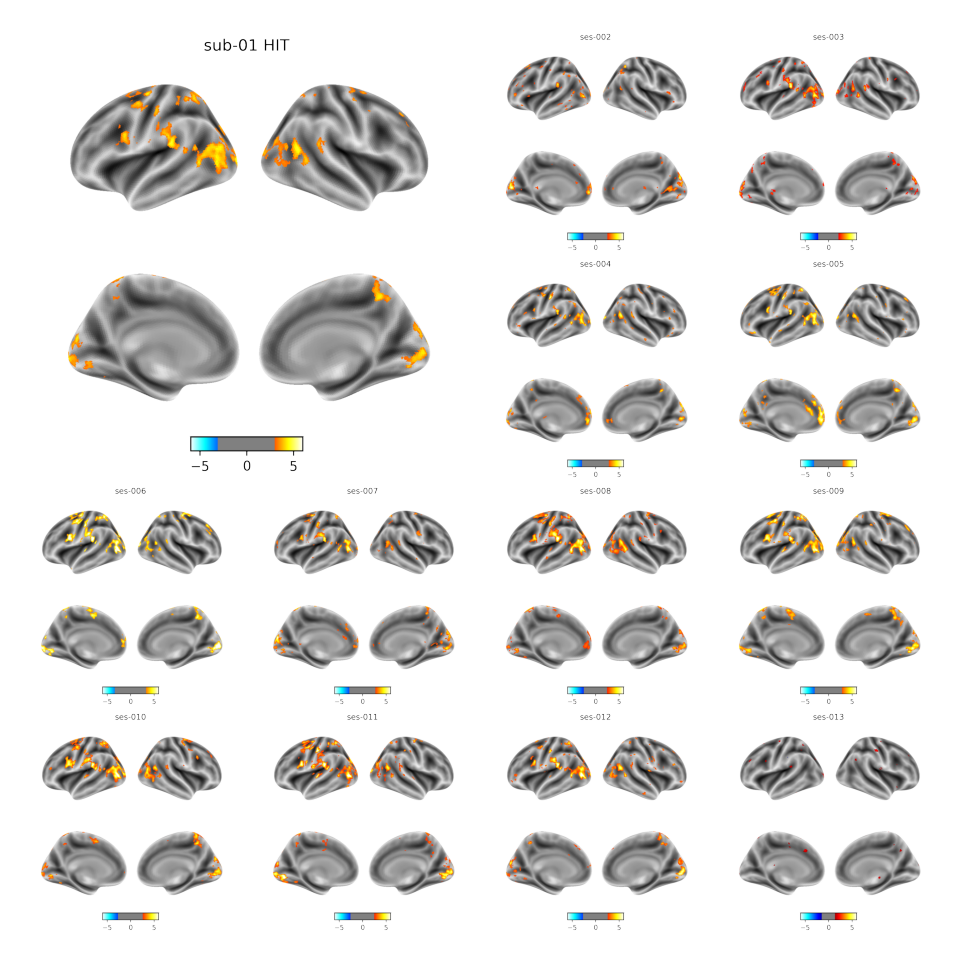

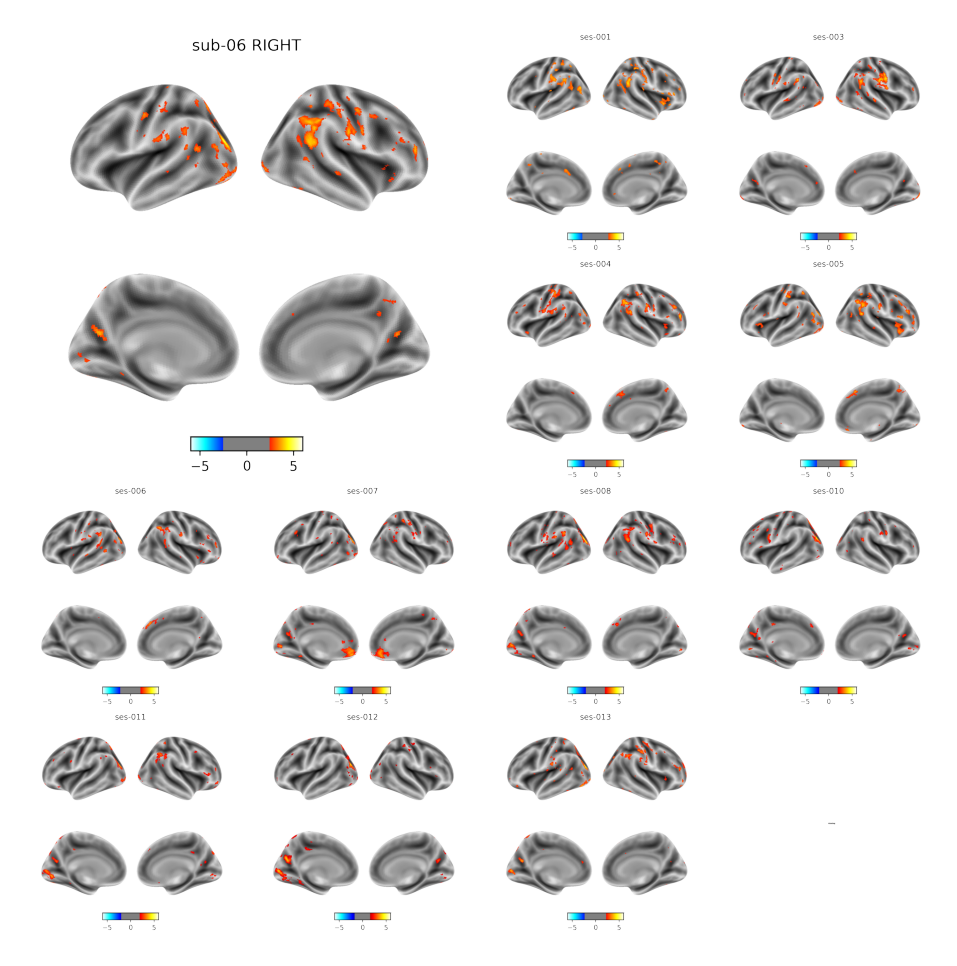

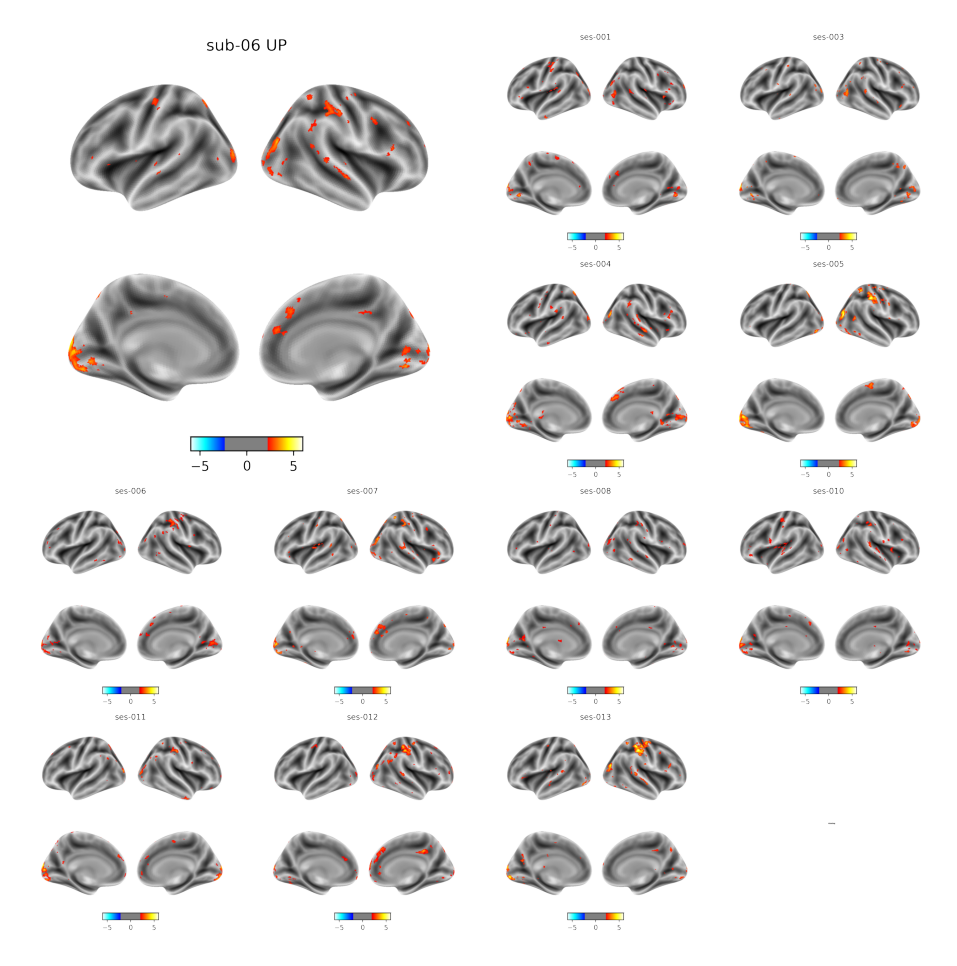

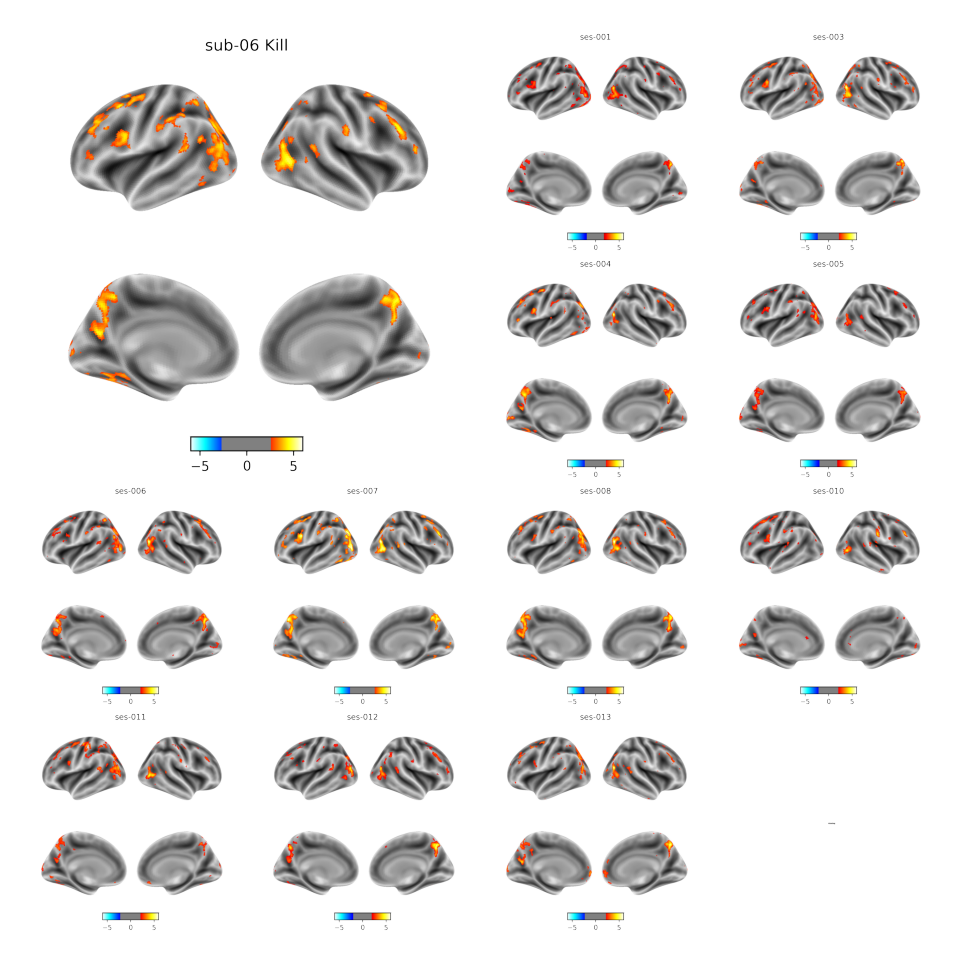

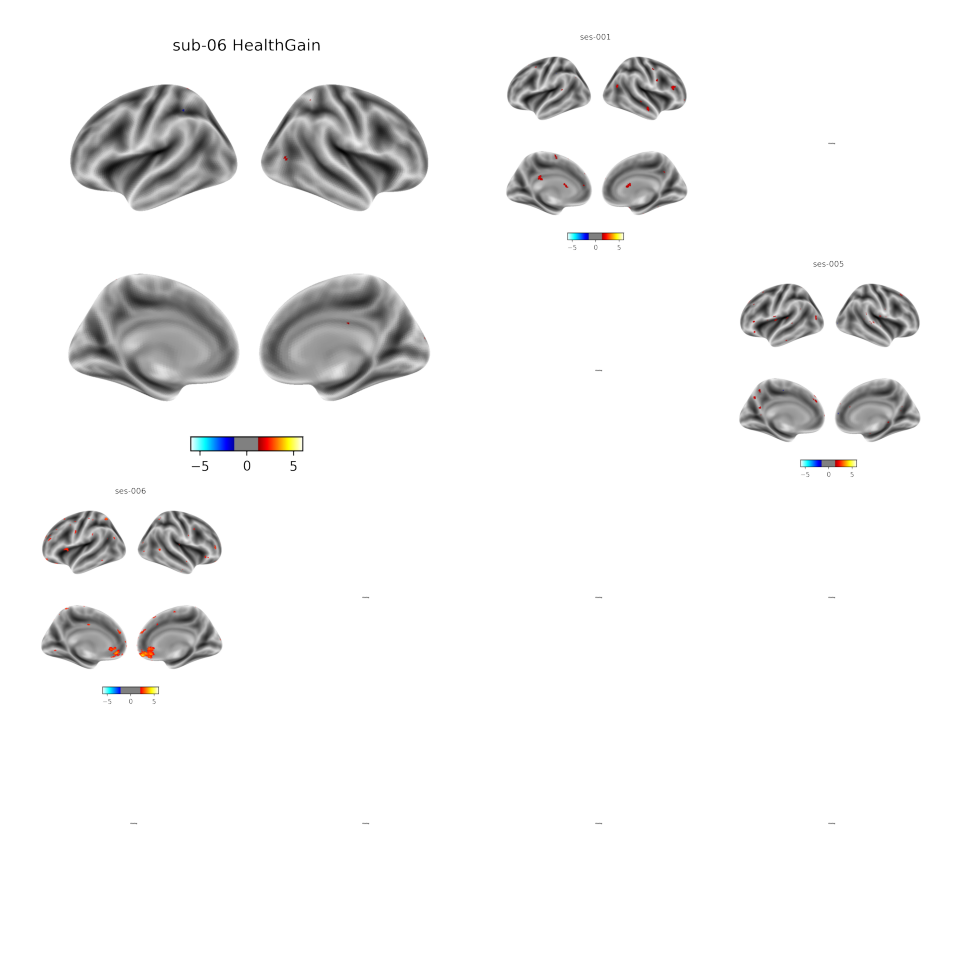

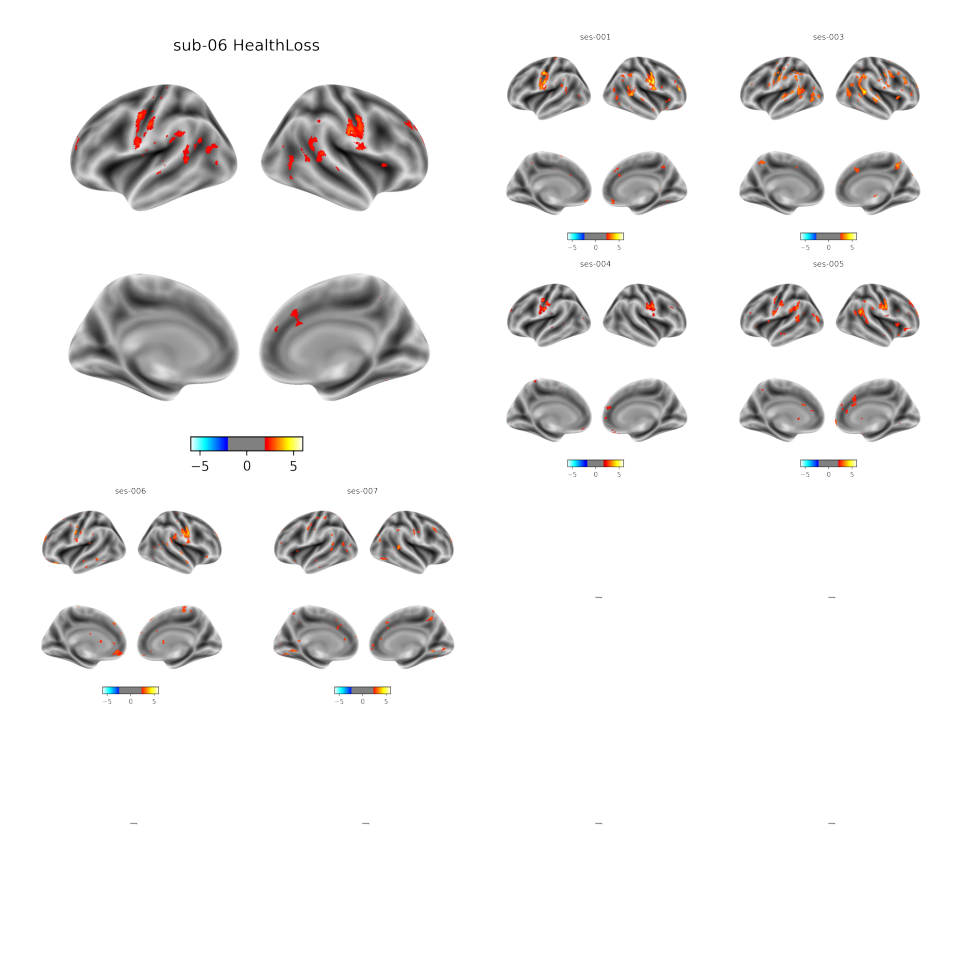

In [13]:
# Make ALL the plots
for subject in ["sub-06"]:#shinobi_behav.SUBJECTS:
    for condition in ['RIGHT', 'UP', 'Kill', 'HealthGain', 'HealthLoss']:#'HIT', 'JUMP', 'DOWN', 'LEFT', 
        fig_folder = os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", 
                                  "reports", "figures", "full_zmap_plot", subject, condition)
        os.makedirs(fig_folder, exist_ok=True)

        create_all_images(subject, condition, fig_folder)

        save_path = os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", 
                                  "reports", "figures", "full_zmap_plot", f"{subject}_{condition}_full_zmaps.png")
        make_full_plot(subject, condition, fig_folder, save_path)

In [2]:
#!pip install reportlab
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from PIL import Image
import os

def create_pdf_with_images(image_folder, pdf_filename):
    c = canvas.Canvas(pdf_filename, pagesize=letter)

    images = sorted([os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith('.png')])

    for image_path in images:
        print(images)
        c.drawImage(image_path, 0, 0, width=letter[0], height=letter[1])  # Draws image on the canvas
        c.showPage()  # Ends the current page and starts a new one

    c.save()  # Save the PDF

# example usage
create_pdf_with_images(os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", "reports", "figures", "full_zmap_plot"), 
                       'inflated_zmaps.pdf')

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

['/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_DOWN_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HIT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthGain_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_HealthLoss_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_JUMP_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_Kill_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_LEFT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figures/full_zmap_plot/sub-01_RIGHT_full_zmaps.png', '/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri/reports/figu

In [ ]:
image_folder = os.path.join("/home/hyruuk/projects/def-pbellec/hyruuk/shinobi_fmri", "reports", "figures", "full_zmap_plot") 

pdf_filename = os.path.join(image_folder, 'inflated_zmaps.pdf')

c = canvas.Canvas(pdf_filename, pagesize=letter)

images = sorted([os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith('.png')])

for image_path in images:
    print(image_path)
    c.drawImage(image_path, 0, 0, width=letter[0], height=letter[1])  # Draws image on the canvas
    c.showPage()  # Ends the current page and starts a new one

c.save()  # Save the PDF
